In [212]:
import pandas as pd
import numpy as np
import datetime

orders = pd.read_csv("Machine_Learning_Lab/data/orders.csv")
orders.describe()
orders.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,-$288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,-$96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,$311.52,903.04,Critical


In [213]:
orders['Profit'] = orders['Profit'].apply(lambda x: x.replace('$', "")).apply(lambda x: x.replace(',', "")).astype('float')
orders['Sales'] = orders['Sales'].apply(lambda x: x.replace('$', "")).apply(lambda x: x.replace(',', "")).astype('float')

In [214]:
orders['Order.Date'] = pd.to_datetime(orders['Order.Date'])
orders['Ship.Date'] = pd.to_datetime(orders['Ship.Date'])

In [215]:
orders['Order.Month'] = orders['Order.Date'].dt.month
orders['Ship.Month'] = orders['Ship.Date'].dt.month

In [216]:
orders.groupby('Order.Month').sum()

,Row.ID,Postal.Code,Sales,Quantity,Discount,Profit,Shipping.Cost,Ship.Month
Order.Month,,,,,,,,
1,71468915,21500486.0,676789.30,8872,365.122,73440.45,71225.18900,2971
2,60085551,17761468.0,554650.21,7429,307.574,72932.18,59878.28000,4758
3,79093205,36758872.0,760518.34,10390,432.354,91873.45,76723.92404,9418
4,75926778,34498859.0,695978.86,10466,448.146,73822.57,75072.86600,12485
5,98261611,40926610.0,915493.24,13196,543.822,106970.07,102015.17500,19482
6,131905558,37416928.0,1262081.29,18009,790.932,144604.35,136484.15800,32484
7,83547530,38467854.0,752306.46,11046,480.996,76525.50,83946.55136,22766
8,134609033,40569319.0,1294315.55,17596,669.940,154593.48,136980.73600,41138
9,152061754,74350359.0,1431754.01,20479,817.468,169705.94,149609.70900,54283


In [217]:
category2 = orders.groupby(['Order.Month','Category']).sum()

category2 = category2.reset_index()

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.,
        16000.]), <a list of 9 Text yticklabel objects>)

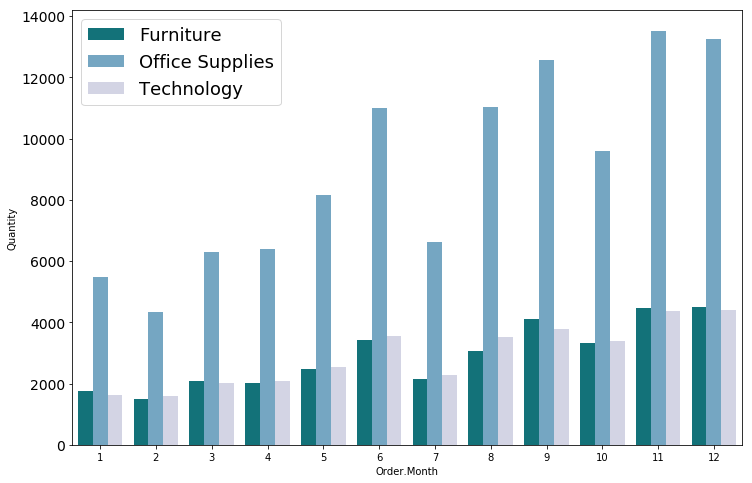

In [219]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.barplot(y="Quantity", x="Order.Month", hue="Category", data= category2, palette='PuBuGn_r')
plt.legend(loc='best', fontsize='18')
plt.yticks(fontsize='14')